In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import datetime
from sklearn.preprocessing import OneHotEncoder

In [2]:
records = pd.read_csv("records.csv", encoding='latin-1')

In [3]:
records = records[records["Intake Type"] == 'Stray']
records = records[records["Outcome Type"] != 'Disposal']
records = records[records["Outcome Type"] != 'Missing']
records = records[records["Outcome Type"] != '']
records = records.dropna()
records = records[records["Outcome Type"] != 'Relocate']
records = records.replace('Rto-Adopt', 'Return to Owner')
#records = records.replace('Return to Owner', 'Return')
records = records.reset_index(drop = True)

In [4]:
records['DateTime_In']=pd.to_datetime(records['DateTime_In'])
records['month']=""
#records["DateTime"][0].month

In [5]:
records.head()

,Unnamed: 0,Animal ID,Name_In,DateTime_In,MonthYear_In,Found Location,Intake Type,Intake Condition,Animal Type_In,Sex upon Intake,...,MonthYear_Out,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_Out,Sex upon Outcome,Age upon Outcome,Breed_Out,Color_Out,month
0,0,A748291,*Madison,2017-05-01 14:26:00,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,...,09/04/2017 12:00:00 AM,06/01/2016,Transfer,Partner,Dog,Spayed Female,1 year,Pit Bull Mix,Black,
1,35,A679549,*Gilbert,2014-05-22 15:43:00,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,...,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black/White,
2,36,A683798,Mustachala,2016-07-21 12:16:00,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,...,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,
3,50,A709749,*Janeane,2015-08-12 18:29:00,08/12/2015 06:29:00 PM,4800 Weletka Dr in Austin (TX),Stray,Normal,Cat,Intact Female,...,09/22/2015 12:49:00 PM,08/12/2014,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Calico,
4,53,A733551,*Phillip,2016-08-23 14:35:00,08/23/2016 02:35:00 PM,183 And Cameron in Austin (TX),Stray,Normal,Cat,Intact Male,...,09/01/2016 12:00:00 AM,06/23/2016,Transfer,Partner,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby/White,


In [6]:
records['month'][0] = records['DateTime_In'][0].month

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
s1 = pd.Series([])
for i in range(len(records)):
     s1.set_value(i, records['DateTime_In'][i].month)

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
records['month'] = s1

In [9]:
records.head()

,Unnamed: 0,Animal ID,Name_In,DateTime_In,MonthYear_In,Found Location,Intake Type,Intake Condition,Animal Type_In,Sex upon Intake,...,MonthYear_Out,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_Out,Sex upon Outcome,Age upon Outcome,Breed_Out,Color_Out,month
0,0,A748291,*Madison,2017-05-01 14:26:00,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,...,09/04/2017 12:00:00 AM,06/01/2016,Transfer,Partner,Dog,Spayed Female,1 year,Pit Bull Mix,Black,5
1,35,A679549,*Gilbert,2014-05-22 15:43:00,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,...,06/16/2014 01:54:00 PM,03/31/2014,Transfer,Partner,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black/White,5
2,36,A683798,Mustachala,2016-07-21 12:16:00,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,...,10/18/2016 10:55:00 AM,01/15/2013,Adoption,Foster,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black,7
3,50,A709749,*Janeane,2015-08-12 18:29:00,08/12/2015 06:29:00 PM,4800 Weletka Dr in Austin (TX),Stray,Normal,Cat,Intact Female,...,09/22/2015 12:49:00 PM,08/12/2014,Transfer,Partner,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Calico,8
4,53,A733551,*Phillip,2016-08-23 14:35:00,08/23/2016 02:35:00 PM,183 And Cameron in Austin (TX),Stray,Normal,Cat,Intact Male,...,09/01/2016 12:00:00 AM,06/23/2016,Transfer,Partner,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby/White,8


In [10]:
#stray_clustering = records.drop(['Intake Type_In','Unnamed: 0','index','Unnamed: 0.1','Animal ID','Name','DateTime','MonthYear','Address','City', 'State','Address.1','Color','Breed'],axis = 1)
stray_clustering = records[['Intake Condition', 'Animal Type_In', 'Sex upon Intake', 'Age upon Intake', 'Outcome Type', 'month']]

In [11]:
stray_clustering.head(5)

,Intake Condition,Animal Type_In,Sex upon Intake,Age upon Intake,Outcome Type,month
0,Normal,Dog,Intact Female,10 months,Transfer,5
1,Normal,Cat,Intact Male,1 month,Transfer,5
2,Normal,Cat,Spayed Female,3 years,Adoption,7
3,Normal,Cat,Intact Female,1 year,Transfer,8
4,Normal,Cat,Intact Male,1 month,Transfer,8


In [12]:
new = stray_clustering["Age upon Intake"].str.split(" ", n = 1, expand = True) 

In [13]:
for i in range(len(new)):
    if new[1][i] == 'weeks' or new[1][i] == 'week':
        new[0][i] = float(new[0][i])/52.0
    elif new[1][i] == 'months' or new[1][i] == 'month':
        new[0][i] = float(new[0][i])/12.0
    else:
        new[0][i] = new[0][i]      

In [14]:
stray_clustering["Age"]= new[0] 
stray_clustering.drop(columns =["Age upon Intake"], inplace = True) 
stray_clustering["Age"] = stray_clustering.Age.astype(float)
stray_clustering['Age'].describe()

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

count    15503.000000
mean         1.917876
std          2.736224
min         -1.000000
25%          0.083333
50%          1.000000
75%          2.000000
max         19.000000
Name: Age, dtype: float64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Transforming sex column values using label Encoder
#stray_clustering.iloc[:,0]  = label_encoder.fit_transform(stray_clustering.iloc[:,0])
#stray_clustering.iloc[:,1]  = label_encoder.fit_transform(stray_clustering.iloc[:,1])
#stray_clustering.iloc[:,2]  = label_encoder.fit_transform(stray_clustering.iloc[:,2])
stray_clustering.iloc[:,3]  = label_encoder.fit_transform(stray_clustering.iloc[:,3])
#data_test.iloc[:,2] = label_encoder_sex.fit_transform(data_test.iloc[:,2])

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
stray_clustering = pd.get_dummies(stray_clustering, columns = ["Intake Condition", "Animal Type_In", "Sex upon Intake"])

In [17]:
stray_clustering.head()

,Outcome Type,month,Age,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick,Animal Type_In_Bird,Animal Type_In_Cat,Animal Type_In_Dog,Animal Type_In_Other,Sex upon Intake_Intact Female,Sex upon Intake_Intact Male,Sex upon Intake_Neutered Male,Sex upon Intake_Spayed Female,Sex upon Intake_Unknown
0,4,5,0.833333,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,4,5,0.083333,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,7,3.000000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,4,8,1.000000,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,4,8,0.083333,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [18]:
#from sklearn import preprocessing
#cat_features = ["Intake Condition", "Animal Type_In", "Sex upon Intake", "Outcome Type"]
#enc = preprocessing.LabelEncoder()
#enc.fit(cat_features)
#new_cat_features = enc.transform(cat_features)
#new_cat_features = new_cat_features.reshape(-1, 1) # Needs to be the correct shape
#ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
#print ohe.fit_transform(new_cat_features)

#onehotencoder = OneHotEncoder(categorical_features = [0])
#stray_clustering = onehotencoder.fit_transform(stray_clustering).toarray()

In [19]:
stray_clustering

,Outcome Type,month,Age,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick,Animal Type_In_Bird,Animal Type_In_Cat,Animal Type_In_Dog,Animal Type_In_Other,Sex upon Intake_Intact Female,Sex upon Intake_Intact Male,Sex upon Intake_Neutered Male,Sex upon Intake_Spayed Female,Sex upon Intake_Unknown
0,4,5,0.833333,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,4,5,0.083333,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,7,3.000000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,4,8,1.000000,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,4,8,0.083333,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
5,4,2,2.000000,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6,4,5,0.057692,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
7,2,2,3.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
8,4,10,0.057692,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
9,4,5,2.000000,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [20]:
stray_clustering["Age"] = stray_clustering.Age.astype(float)
stray_clustering['Age'].describe()

count    15503.000000
mean         1.917876
std          2.736224
min         -1.000000
25%          0.083333
50%          1.000000
75%          2.000000
max         19.000000
Name: Age, dtype: float64

In [21]:
df_shuffle = stray_clustering.sample(frac=1).reset_index(drop=True)
X = df_shuffle.drop('Outcome Type', axis = 1)
y = df_shuffle[['Outcome Type']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75)

In [22]:
#kclusters = 5

#kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stray_clustering)
#kmeans.labels_[0:10]

In [23]:
stray_clustering.head()

,Outcome Type,month,Age,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick,Animal Type_In_Bird,Animal Type_In_Cat,Animal Type_In_Dog,Animal Type_In_Other,Sex upon Intake_Intact Female,Sex upon Intake_Intact Male,Sex upon Intake_Neutered Male,Sex upon Intake_Spayed Female,Sex upon Intake_Unknown
0,4,5,0.833333,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,4,5,0.083333,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,7,3.000000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,4,8,1.000000,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,4,8,0.083333,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

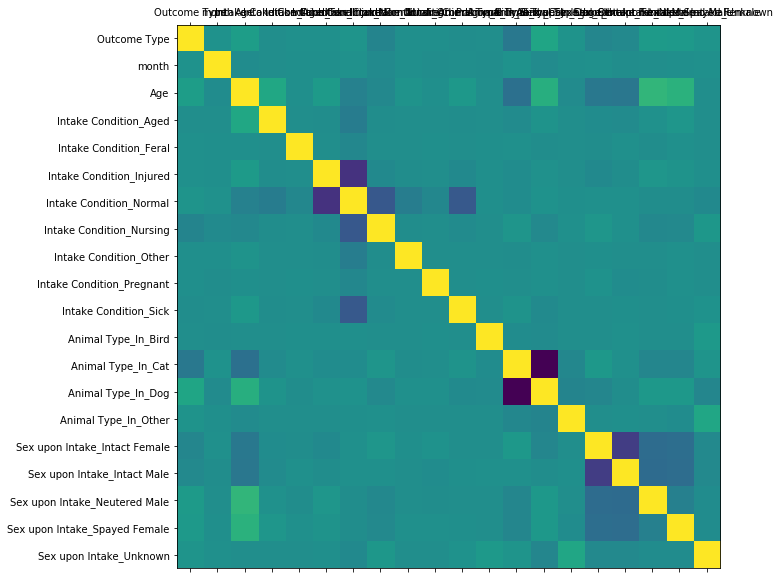

In [25]:
import matplotlib.pyplot as plt
corr = stray_clustering.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [26]:
corr

,Outcome Type,month,Age,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick,Animal Type_In_Bird,Animal Type_In_Cat,Animal Type_In_Dog,Animal Type_In_Other,Sex upon Intake_Intact Female,Sex upon Intake_Intact Male,Sex upon Intake_Neutered Male,Sex upon Intake_Spayed Female,Sex upon Intake_Unknown
Outcome Type,1.000000,0.024056,0.119251,-0.001436,0.009348,0.013353,0.039757,-0.090944,0.005441,0.003944,-0.014208,-0.002240,-0.188412,0.182702,0.035369,-0.074086,-0.049343,0.096164,0.086219,0.039650
month,0.024056,1.000000,-0.022404,-0.008856,-0.000508,0.003666,0.019153,-0.033424,0.003950,-0.011462,-0.007724,-0.016399,0.026924,-0.026933,0.005564,0.009243,-0.009523,-0.001242,-0.000678,0.011706
Age,0.119251,-0.022404,1.000000,0.194194,0.003370,0.096461,-0.117330,-0.059237,0.034945,0.005405,0.071731,-0.008581,-0.257317,0.261227,-0.025841,-0.192460,-0.196094,0.317709,0.284643,-0.006332
Intake Condition_Aged,-0.001436,-0.008856,0.194194,1.000000,-0.001474,-0.015355,-0.152672,-0.009704,-0.003165,-0.001474,-0.009453,-0.001398,-0.029433,0.030132,-0.004458,-0.017671,-0.028559,0.016904,0.056577,-0.003879
Intake Condition_Feral,0.009348,-0.000508,0.003370,-0.001474,1.000000,-0.006725,-0.066860,-0.004250,-0.001386,-0.000645,-0.004140,-0.000612,0.014201,-0.013842,-0.001952,-0.009350,0.010686,-0.009277,0.007879,-0.001699
Intake Condition_Injured,0.013353,0.003666,0.096461,-0.015355,-0.006725,1.000000,-0.696572,-0.044276,-0.014439,-0.006725,-0.043130,0.004447,-0.017491,0.018273,-0.006684,-0.041499,-0.015130,0.055506,0.031038,0.001890
Intake Condition_Normal,0.039757,0.019153,-0.117330,-0.152672,-0.066860,-0.696572,1.000000,-0.440229,-0.143567,-0.066860,-0.428837,0.001093,-0.023221,0.022542,0.003767,0.008556,0.012928,-0.012582,-0.011234,-0.044635
Intake Condition_Nursing,-0.090944,-0.033424,-0.059237,-0.009704,-0.004250,-0.044276,-0.440229,1.000000,-0.009126,-0.004250,-0.027258,-0.004032,0.053072,-0.053993,0.007903,0.053344,0.008554,-0.058623,-0.050813,0.066230
Intake Condition_Other,0.005441,0.003950,0.034945,-0.003165,-0.001386,-0.014439,-0.143567,-0.009126,1.000000,-0.001386,-0.008889,-0.001315,-0.013186,0.013871,-0.004192,0.003884,-0.007630,-0.001517,0.008406,-0.003648
Intake Condition_Pregnant,0.003944,-0.011462,0.005405,-0.001474,-0.000645,-0.006725,-0.066860,-0.004250,-0.001386,1.000000,-0.004140,-0.000612,-0.006364,0.006683,-0.001952,0.022078,-0.020504,-0.009277,0.007879,-0.001699


In [27]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


65.61

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


68.74

In [30]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4.44

In [31]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


62.94

In [32]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Alex Hilton\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


48.4

In [33]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

75.75

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


75.75

In [35]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,75.75
6,Decision Tree,75.75
1,KNN,68.74
0,Support Vector Machines,65.61
5,Linear SVC,62.94
4,Stochastic Gradient Decent,48.40
3,Naive Bayes,4.44


In [36]:
y_test['Y_pred'] = Y_pred

C:\Users\Alex Hilton\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
y_test

,Outcome Type,Y_pred
3429,4,4
10863,0,0
12643,4,4
389,4,4
4819,0,0
4194,4,4
4346,0,0
12430,4,0
608,0,0
3276,4,4


In [38]:
fail = 0;
tester = y_test.reset_index()
for i in range(len(tester)):
        if tester['Outcome Type'][i] != tester['Y_pred'][i]:
            fail += 1
fail_rate = fail/len(tester)*100
fail_rate

33.126934984520126

In [39]:
100-fail_rate

66.87306501547988